<a href="https://colab.research.google.com/github/busiri/busil/blob/main/2%EB%8B%A8%EA%B3%84(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import platform
import matplotlib
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# 폰트 설치
!sudo apt-get install -y fonts-nanum

# 설치된 Nanum 폰트 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum/']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

# 폰트 매니저에 폰트 추가
for font_file in font_files:
    fm.fontManager.addfont(font_file)

for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in f:
        print(f)
# 폰트 이름 확인
nanum_font = fm.FontProperties(fname=font_files[0]).get_name()

# 폰트 설정
plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = nanum_font
mpl.rcParams['axes.unicode_minus'] = False

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False


print(f"✅ 한글 폰트 설치 및 설정 완료! 적용 폰트: {nanum_font}")

pd.set_option("display.max_columns", None)   # 열 생략 없이 전부 출력
pd.set_option("display.expand_frame_repr", False)  # 줄 넘김 없이 한 줄에 출력

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and direc

### 데이터 불러오기

In [2]:
df_도입 = pd.read_csv('/content/eda도입.csv')
df_성장 = pd.read_csv('/content/eda성장.csv')
df_성숙 = pd.read_csv('/content/eda성숙.csv')
df_쇠퇴 = pd.read_csv('/content/eda쇠퇴.csv')

In [3]:
value = (df_도입['부실여부'].value_counts().iloc[1])/len(df_도입)
print(f'도입기 데이터 부실 비율 : {value*100:.4f}%')
value2 = (df_성장['부실여부'].value_counts().iloc[1])/len(df_성장)
print(f'성장기 데이터 부실 비율 : {value2*100:.4f}%')
value3 = (df_성숙['부실여부'].value_counts().iloc[1])/len(df_성숙)
print(f'성숙기 데이터 부실 비율 : {value3*100:.4f}%')
value4 = (df_쇠퇴['부실여부'].value_counts().iloc[1])/len(df_쇠퇴)
print(f'쇠퇴기 데이터 부실 비율 : {value4*100:.4f}%')

도입기 데이터 부실 비율 : 9.9258%
성장기 데이터 부실 비율 : 2.9847%
성숙기 데이터 부실 비율 : 3.1310%
쇠퇴기 데이터 부실 비율 : 15.4273%


In [6]:
df_도입['생애주기'] = '도입'
df_성장['생애주기'] = '성장'
df_성숙['생애주기'] = '성숙'
df_쇠퇴['생애주기'] = '쇠퇴'

### 국면별로 정상기업과 부실기업 집단의 기초통계량 확인

In [7]:
df = pd.concat([df_도입,df_성장,df_성숙,df_쇠퇴],axis=0)
# '생애주기' 단계별로 수치형 컬럼의 기초 통계(describe) 확인
desc_by_stage = (
    df.groupby(['생애주기','부실여부']).describe()        # 각 그룹에 대해 describe() 실행
)

# 보기 좋게 하려면: 다층 컬럼 → 평면화
desc_by_stage.columns = ['_'.join(col).strip() for col in desc_by_stage.columns]

# 결과 확인
desc_by_stage

거래소코드_count    거래소코드_mean     거래소코드_std  거래소코드_min  거래소코드_25%  거래소코드_50%  거래소코드_75%  거래소코드_max  회계년도_count    회계년도_mean  회계년도_std  회계년도_min  회계년도_25%  회계년도_50%  회계년도_75%  회계년도_max  총자본증가율_count  총자본증가율_mean  총자본증가율_std  총자본증가율_min  총자본증가율_25%  총자본증가율_50%  총자본증가율_75%  총자본증가율_max  유형자산증가율_count   유형자산증가율_mean   유형자산증가율_std  유형자산증가율_min  유형자산증가율_25%  유형자산증가율_50%  유형자산증가율_75%   유형자산증가율_max  비유동자산증가율_count  비유동자산증가율_mean  비유동자산증가율_std  비유동자산증가율_min  비유동자산증가율_25%  비유동자산증가율_50%  비유동자산증가율_75%  비유동자산증가율_max  유동자산증가율_count  유동자산증가율_mean    유동자산증가율_std  유동자산증가율_min  유동자산증가율_25%  유동자산증가율_50%  유동자산증가율_75%  유동자산증가율_max  재고자산증가율_count  재고자산증가율_mean    재고자산증가율_std  재고자산증가율_min  재고자산증가율_25%  재고자산증가율_50%  재고자산증가율_75%  재고자산증가율_max  자기자본증가율_count  자기자본증가율_mean   자기자본증가율_std  자기자본증가율_min  자기자본증가율_25%  자기자본증가율_50%  자기자본증가율_75%  자기자본증가율_max  매출액증가율_count  매출액증가율_mean     매출액증가율_std  매출액증가율_min  매출액증가율_25%  매출액증가율_50%  매출액증가율_75%   매출액증가율_max  영업이익증가율_count  영업이익증가율_mean   영업이익증가율_std  영업이익증가율_min  영업이익증가율_25%  영업이익증가율_50%  영업이익증가율_75%  영업이익증가율_max  순이익증가율_count  순이익증가율_mean    순이익증가율_std  순이익증가율_min  순이익증가율_25%  순이익증가율_50%  순이익증가율_75%  순이익증가율_max  종업원1인당 부가가치증가율_count  종업원1인당 부가가치증가율_mean  종업원1인당 부가가치증가율_std  종업원1인당 부가가치증가율_min  종업원1인당 부가가치증가율_25%  종업원1인당 부가가치증가율_50%  종업원1인당 부가가치증가율_75%  종업원1인당 부가가치증가율_max  종업원수증가율_count  종업원수증가율_mean  종업원수증가율_std  종업원수증가율_min  종업원수증가율_25%  종업원수증가율_50%  종업원수증가율_75%  종업원수증가율_max  종업원1인당 매출액증가율_count  종업원1인당 매출액증가율_mean  종업원1인당 매출액증가율_std  종업원1인당 매출액증가율_min  종업원1인당 매출액증가율_25%  종업원1인당 매출액증가율_50%  종업원1인당 매출액증가율_75%  종업원1인당 매출액증가율_max  종업원1인당 인건비증가율_count  종업원1인당 인건비증가율_mean  종업원1인당 인건비증가율_std  종업원1인당 인건비증가율_min  종업원1인당 인건비증가율_25%  종업원1인당 인건비증가율_50%  종업원1인당 인건비증가율_75%  종업원1인당 인건비증가율_max  매출액총이익률_count  매출액총이익률_mean  매출액총이익률_std  매출액총이익률_min  매출액총이익률_25%  매출액총이익률_50%  매출액총이익률_75%  매출액총이익률_max  영업이익률(매출액)_count  영업이익률(매출액)_mean  영업이익률(매출액)_std  영업이익률(매출액)_min  영업이익률(매출액)_25%  영업이익률(매출액)_50%  영업이익률(매출액)_75%  영업이익률(매출액)_max  매출액순이익률_count  매출액순이익률_mean    매출액순이익률_std  매출액순이익률_min  매출액순이익률_25%  매출액순이익률_50%  매출액순이익률_75%  매출액순이익률_max  총자본사업이익률_count  총자본사업이익률_mean  총자본사업이익률_std  총자본사업이익률_min  총자본사업이익률_25%  총자본사업이익률_50%  총자본사업이익률_75%  총자본사업이익률_max  총자본영업이익률_count  총자본영업이익률_mean  총자본영업이익률_std  총자본영업이익률_min  총자본영업이익률_25%  총자본영업이익률_50%  총자본영업이익률_75%  총자본영업이익률_max  총자본순이익률_count  총자본순이익률_mean  총자본순이익률_std  총자본순이익률_min  총자본순이익률_25%  총자본순이익률_50%  총자본순이익률_75%  총자본순이익률_max  자기자본영업이익률_count  자기자본영업이익률_mean  자기자본영업이익률_std  자기자본영업이익률_min  자기자본영업이익률_25%  자기자본영업이익률_50%  자기자본영업이익률_75%  자기자본영업이익률_max  자기자본순이익률_count  자기자본순이익률_mean  자기자본순이익률_std  자기자본순이익률_min  자기자본순이익률_25%  자기자본순이익률_50%  자기자본순이익률_75%  자기자본순이익률_max  경영자본영업이익률_count  경영자본영업이익률_mean  경영자본영업이익률_std  경영자본영업이익률_min  경영자본영업이익률_25%  경영자본영업이익률_50%  경영자본영업이익률_75%  경영자본영업이익률_max  경영자본순이익률_count  경영자본순이익률_mean  경영자본순이익률_std  경영자본순이익률_min  경영자본순이익률_25%  경영자본순이익률_50%  경영자본순이익률_75%  경영자본순이익률_max  자본금영업이익률_count  자본금영업이익률_mean  자본금영업이익률_std  자본금영업이익률_min  자본금영업이익률_25%  자본금영업이익률_50%  자본금영업이익률_75%  자본금영업이익률_max  자본금순이익률_count   자본금순이익률_mean   자본금순이익률_std   자본금순이익률_min  자본금순이익률_25%  자본금순이익률_50%  자본금순이익률_75%   자본금순이익률_max  매출원가 대 매출액비율_count  매출원가 대 매출액비율_mean  매출원가 대 매출액비율_std  매출원가 대 매출액비율_min  매출원가 대 매출액비율_25%  매출원가 대 매출액비율_50%  매출원가 대 매출액비율_75%  매출원가 대 매출액비율_max  영업비용대영업수익비율_count  영업비용대영업수익비율_mean  영업비용대영업수익비율_std  영업비용대영업수익비율_min  영업비용대영업수익비율_25%  영업비용대영업수익비율_50%  영업비용대영업수익비율_75%  영업비용대영업수익비율_max  금융비용부담률_count  금융비용부담률_mean    금융비용부담률_std  금융비용부담률_min  금융비용부담률_25%  금융비용부담률_50%  금융비용부담률_75%  금융비용부담률_max  외환이익 대 매출액비율_count  외환이익 대 매출액비율_mean  외환이익 대 매출액비율_std  외환이익 대 매출액비율_min  외환이익 대 매출액비율_25%  외환이익 대 매출액비율_50%  외환이익 대 매출액비율_75%  외환이익 대 매출액비율_max  광고선전비 대 매출액비율_count  광고선전비 대 매출액비율_mean  광고선전비 대 매출액비율_std  광고선전비 대 매출액비율_min  광고선전비 대 매출액비율_25%  광고선전비 대 매출액비율_50%  광고선전비 대 매출액비율_75%  광고선전비 대 매출액비율_max  세전이익대비세금율(차감전)_count  세전이익대비세금율(차감전)_mean  세전이익대비세금율(차감전)_std  세전이익대비세금율(차감전)_min  세전이익대비세금율(차감전)_25%  세전이익대비세금율(차감전)_50%  세전이익대비세금율(차감전)_75%  세전이익대비세금율(차감전)_max  기업순이익률_count  기업순이익률_mean  기업순이

In [8]:
# 평균
mean_col = [x for x in desc_by_stage.columns if 'mean' in x]
desc_by_stage[mean_col]

거래소코드_mean    회계년도_mean  총자본증가율_mean   유형자산증가율_mean  비유동자산증가율_mean  유동자산증가율_mean  재고자산증가율_mean  자기자본증가율_mean  매출액증가율_mean  영업이익증가율_mean  순이익증가율_mean  종업원1인당 부가가치증가율_mean  종업원수증가율_mean  종업원1인당 매출액증가율_mean  종업원1인당 인건비증가율_mean  매출액총이익률_mean  영업이익률(매출액)_mean  매출액순이익률_mean  총자본사업이익률_mean  총자본영업이익률_mean  총자본순이익률_mean  자기자본영업이익률_mean  자기자본순이익률_mean  경영자본영업이익률_mean  경영자본순이익률_mean  자본금영업이익률_mean   자본금순이익률_mean  매출원가 대 매출액비율_mean  영업비용대영업수익비율_mean  금융비용부담률_mean  외환이익 대 매출액비율_mean  광고선전비 대 매출액비율_mean  세전이익대비세금율(차감전)_mean  기업순이익률_mean      수지비율_mean  인건비 대 총비용비율_mean  R & D 투자효율_mean  총비용대비세금율_mean  금융비용 대 총비용비율_mean  감가상각비 대 총비용비율_mean  감가상각률_mean  누적감가상각률_mean  이자부담률_mean    지급이자율_mean  차입금평균이자율_mean       유보율_mean  사내유보율_mean  사내유보 대 자기자본비율_mean  적립금비율(재정비율)_mean   평균배당률_mean  자기자본배당률_mean  배당성향_mean  1주당매출액(원)_mean  유동자산구성비율_mean  재고자산 대 유동자산비율_mean  유동자산 대 비유동자산비율_mean  당좌자산구성비율_mean  비유동자산구성비율_mean  자기자본구성비율_mean  타인자본구성비율_mean    자기자본배율_mean   비유동비율_mean  비유동장기적합률_mean    유동비율_mean    당좌비율_mean   현금비율_mean    매출채권비율_mean  재고자산 대 순운전자본비율_mean  매출채권 대 매입채무비율_mean  매출채권 대 상,제품비율_mean  매입채무 대 재고자산비율_mean    부채비율_mean  유동부채비율_mean  단기차입금 대 총차입금비율_mean  비유동부채비율_mean  비유동부채 대 순운전자본비율_mean  순운전자본비율_mean  차입금의존도_mean   차입금비율_mean  유보액대비율_mean  유보액 대 납입자본배율_mean  유동자산집중도_mean  비유동자산집중도_mean    투자집중도_mean  CASH FLOW 대 부채비율_mean  CASH FLOW 대 차입금비율_mean  CASH FLOW 대 총자본비율_mean  CASH FLOW 대 매출액비율_mean  총자본회전률_mean  경영자본회전률_mean  자기자본회전률_mean   자본금회전률_mean  타인자본회전률_mean  매입채무회전률_mean  매입채무회전기간_mean  유동자산회전률_mean  당좌자산회전률_mean  재고자산회전률_mean  재고자산회전기간_mean  상품,제품회전률_mean  원,부재료회전률_mean  재공품회전률_mean  매출채권회전률_mean  매출채권회전기간_mean  비유동자산회전률_mean  유형자산회전율_mean  순운전자본회전률_mean  운전자본회전률_mean  1회전기간_mean  부가가치(백만원)_mean  종업원1인당 부가가치(백만원)_mean  종업원1인당 매출액(백만원)_mean  종업원당영업이익(백만원)_mean  종업원1인당 순이익(백만원)_mean  종업원1인당 인건비(백만원)_mean  노동장비율_mean  기계장비율_mean  자본집약도_mean  총자본투자효율_mean   설비투자효율_mean   기계투자효율_mean  부가가치율_mean  노동소득분배율_mean  자본분배율_mean    이윤분배율_mean  영업현금흐름(천원)_mean  투자활동으로 인한 현금흐름(*)(천원)_mean  재무활동으로 인한 현금흐름(*)(천원)_mean  IFRS_CONN_mean  IFRS_mean    종업원_mean  대표이사변경여부_mean  수도권_mean    업력_mean   급여(천원)_mean  당기순이익(손실)(천원)_mean  대손상각비(천원)_mean  매출액(천원)_mean  매출원가(천원)_mean  법인세비용차감전손익(천원)_mean   부채(천원)_mean  비유동자산(천원)_mean  영업비용(천원)_mean  영업이익(손실)(천원)_mean  유동부채(천원)_mean  유동자산(천원)_mean  이익잉여금(천원)_mean  이자비용(천원)_mean  이자수익(천원)_mean   자본(천원)_mean  자본금(천원)_mean  자본잉여금(천원)_mean   자산(천원)_mean  재고자산(천원)_mean  현금및현금성자산(천원)_mean  GAAP_mean  회계년도연속여부_mean
생애주기 부실여부                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
# 최대
max_col = [x for x in desc_by_stage.columns if 'max' in x]
desc_by_stage[max_col]

거래소코드_max  회계년도_max  총자본증가율_max   유형자산증가율_max  비유동자산증가율_max  유동자산증가율_max  재고자산증가율_max  자기자본증가율_max   매출액증가율_max  영업이익증가율_max  순이익증가율_max  종업원1인당 부가가치증가율_max  종업원수증가율_max  종업원1인당 매출액증가율_max  종업원1인당 인건비증가율_max  매출액총이익률_max  영업이익률(매출액)_max  매출액순이익률_max  총자본사업이익률_max  총자본영업이익률_max  총자본순이익률_max  자기자본영업이익률_max  자기자본순이익률_max  경영자본영업이익률_max  경영자본순이익률_max  자본금영업이익률_max   자본금순이익률_max  매출원가 대 매출액비율_max  영업비용대영업수익비율_max  금융비용부담률_max  외환이익 대 매출액비율_max  광고선전비 대 매출액비율_max  세전이익대비세금율(차감전)_max  기업순이익률_max      수지비율_max  인건비 대 총비용비율_max  R & D 투자효율_max  총비용대비세금율_max  금융비용 대 총비용비율_max  감가상각비 대 총비용비율_max  감가상각률_max   누적감가상각률_max  이자부담률_max     지급이자율_max  차입금평균이자율_max       유보율_max  사내유보율_max  사내유보 대 자기자본비율_max  적립금비율(재정비율)_max     평균배당률_max  자기자본배당률_max    배당성향_max  1주당매출액(원)_max  유동자산구성비율_max  재고자산 대 유동자산비율_max  유동자산 대 비유동자산비율_max  당좌자산구성비율_max  비유동자산구성비율_max  자기자본구성비율_max  타인자본구성비율_max    자기자본배율_max     비유동비율_max  비유동장기적합률_max     유동비율_max     당좌비율_max    현금비율_max    매출채권비율_max  재고자산 대 순운전자본비율_max  매출채권 대 매입채무비율_max  매출채권 대 상,제품비율_max  매입채무 대 재고자산비율_max      부채비율_max   유동부채비율_max  단기차입금 대 총차입금비율_max   비유동부채비율_max  비유동부채 대 순운전자본비율_max  순운전자본비율_max  차입금의존도_max     차입금비율_max  유보액대비율_max  유보액 대 납입자본배율_max  유동자산집중도_max  비유동자산집중도_max     투자집중도_max  CASH FLOW 대 부채비율_max  CASH FLOW 대 차입금비율_max  CASH FLOW 대 총자본비율_max  CASH FLOW 대 매출액비율_max  총자본회전률_max  경영자본회전률_max  자기자본회전률_max    자본금회전률_max  타인자본회전률_max   매입채무회전률_max  매입채무회전기간_max  유동자산회전률_max  당좌자산회전률_max  재고자산회전률_max  재고자산회전기간_max  상품,제품회전률_max  원,부재료회전률_max    재공품회전률_max   매출채권회전률_max  매출채권회전기간_max  비유동자산회전률_max   유형자산회전율_max  순운전자본회전률_max  운전자본회전률_max  1회전기간_max  부가가치(백만원)_max  종업원1인당 부가가치(백만원)_max  종업원1인당 매출액(백만원)_max  종업원당영업이익(백만원)_max  종업원1인당 순이익(백만원)_max  종업원1인당 인건비(백만원)_max  노동장비율_max  기계장비율_max  자본집약도_max  총자본투자효율_max    설비투자효율_max    기계투자효율_max   부가가치율_max  노동소득분배율_max  자본분배율_max  이윤분배율_max  영업현금흐름(천원)_max  투자활동으로 인한 현금흐름(*)(천원)_max  재무활동으로 인한 현금흐름(*)(천원)_max  IFRS_CONN_max  IFRS_max  종업원_max  대표이사변경여부_max  수도권_max  업력_max    급여(천원)_max  당기순이익(손실)(천원)_max  대손상각비(천원)_max   매출액(천원)_max  매출원가(천원)_max  법인세비용차감전손익(천원)_max    부채(천원)_max  비유동자산(천원)_max  영업비용(천원)_max  영업이익(손실)(천원)_max  유동부채(천원)_max  유동자산(천원)_max  이익잉여금(천원)_max  이자비용(천원)_max  이자수익(천원)_max    자본(천원)_max   자본금(천원)_max  자본잉여금(천원)_max    자산(천원)_max  재고자산(천원)_max  현금및현금성자산(천원)_max  GAAP_max  회계년도연속여부_max
생애주기 부실여부                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [10]:
# 최소
min_col = [x for x in desc_by_stage.columns if 'min' in x]
desc_by_stage[min_col]

거래소코드_min  회계년도_min  총자본증가율_min  유형자산증가율_min  비유동자산증가율_min  유동자산증가율_min  재고자산증가율_min  자기자본증가율_min  매출액증가율_min  영업이익증가율_min  순이익증가율_min  종업원1인당 부가가치증가율_min  종업원수증가율_min  종업원1인당 매출액증가율_min  종업원1인당 인건비증가율_min  매출액총이익률_min  영업이익률(매출액)_min  매출액순이익률_min  총자본사업이익률_min  총자본영업이익률_min  총자본순이익률_min  자기자본영업이익률_min  자기자본순이익률_min  경영자본영업이익률_min  경영자본순이익률_min  자본금영업이익률_min   자본금순이익률_min  매출원가 대 매출액비율_min  영업비용대영업수익비율_min  금융비용부담률_min  외환이익 대 매출액비율_min  광고선전비 대 매출액비율_min  세전이익대비세금율(차감전)_min  기업순이익률_min  수지비율_min  인건비 대 총비용비율_min  R & D 투자효율_min  총비용대비세금율_min  금융비용 대 총비용비율_min  감가상각비 대 총비용비율_min  감가상각률_min  누적감가상각률_min  이자부담률_min  지급이자율_min  차입금평균이자율_min      유보율_min  사내유보율_min  사내유보 대 자기자본비율_min  적립금비율(재정비율)_min  평균배당률_min  자기자본배당률_min  배당성향_min  1주당매출액(원)_min  유동자산구성비율_min  재고자산 대 유동자산비율_min  유동자산 대 비유동자산비율_min  당좌자산구성비율_min  비유동자산구성비율_min  자기자본구성비율_min  타인자본구성비율_min   자기자본배율_min  비유동비율_min  비유동장기적합률_min  유동비율_min  당좌비율_min  현금비율_min  매출채권비율_min  재고자산 대 순운전자본비율_min  매출채권 대 매입채무비율_min  매출채권 대 상,제품비율_min  매입채무 대 재고자산비율_min  부채비율_min  유동부채비율_min  단기차입금 대 총차입금비율_min  비유동부채비율_min  비유동부채 대 순운전자본비율_min  순운전자본비율_min  차입금의존도_min  차입금비율_min  유보액대비율_min  유보액 대 납입자본배율_min  유동자산집중도_min  비유동자산집중도_min  투자집중도_min  CASH FLOW 대 부채비율_min  CASH FLOW 대 차입금비율_min  CASH FLOW 대 총자본비율_min  CASH FLOW 대 매출액비율_min  총자본회전률_min  경영자본회전률_min  자기자본회전률_min    자본금회전률_min  타인자본회전률_min  매입채무회전률_min  매입채무회전기간_min  유동자산회전률_min  당좌자산회전률_min  재고자산회전률_min  재고자산회전기간_min  상품,제품회전률_min  원,부재료회전률_min  재공품회전률_min  매출채권회전률_min  매출채권회전기간_min  비유동자산회전률_min  유형자산회전율_min  순운전자본회전률_min  운전자본회전률_min  1회전기간_min  부가가치(백만원)_min  종업원1인당 부가가치(백만원)_min  종업원1인당 매출액(백만원)_min  종업원당영업이익(백만원)_min  종업원1인당 순이익(백만원)_min  종업원1인당 인건비(백만원)_min  노동장비율_min  기계장비율_min  자본집약도_min  총자본투자효율_min    설비투자효율_min    기계투자효율_min   부가가치율_min  노동소득분배율_min   자본분배율_min     이윤분배율_min  영업현금흐름(천원)_min  투자활동으로 인한 현금흐름(*)(천원)_min  재무활동으로 인한 현금흐름(*)(천원)_min  IFRS_CONN_min  IFRS_min  종업원_min  대표이사변경여부_min  수도권_min  업력_min  급여(천원)_min  당기순이익(손실)(천원)_min  대손상각비(천원)_min  매출액(천원)_min  매출원가(천원)_min  법인세비용차감전손익(천원)_min  부채(천원)_min  비유동자산(천원)_min  영업비용(천원)_min  영업이익(손실)(천원)_min  유동부채(천원)_min  유동자산(천원)_min  이익잉여금(천원)_min  이자비용(천원)_min  이자수익(천원)_min    자본(천원)_min  자본금(천원)_min  자본잉여금(천원)_min  자산(천원)_min  재고자산(천원)_min  현금및현금성자산(천원)_min  GAAP_min  회계년도연속여부_min
생애주기 부실여부                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [11]:
# 0 비율
df.groupby(['생애주기', '부실여부']).apply(lambda group: (group == 0).sum() / len(group))

/tmp/ipython-input-11-3418456660.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['생애주기', '부실여부']).apply(lambda group: (group == 0).sum() / len(group))


회사명  거래소코드  회계년도    총자본증가율   유형자산증가율  비유동자산증가율   유동자산증가율   재고자산증가율   자기자본증가율    매출액증가율   영업이익증가율    순이익증가율  종업원1인당 부가가치증가율   종업원수증가율  종업원1인당 매출액증가율  종업원1인당 인건비증가율   매출액총이익률  영업이익률(매출액)   매출액순이익률  총자본사업이익률  총자본영업이익률   총자본순이익률  자기자본영업이익률  자기자본순이익률  경영자본영업이익률  경영자본순이익률  자본금영업이익률   자본금순이익률  매출원가 대 매출액비율  영업비용대영업수익비율   금융비용부담률  외환이익 대 매출액비율  광고선전비 대 매출액비율  세전이익대비세금율(차감전)    기업순이익률      수지비율  인건비 대 총비용비율  R & D 투자효율  총비용대비세금율  금융비용 대 총비용비율  감가상각비 대 총비용비율     감가상각률   누적감가상각률     이자부담률     지급이자율  차입금평균이자율       유보율     사내유보율  사내유보 대 자기자본비율  적립금비율(재정비율)     평균배당률   자기자본배당률      배당성향  1주당매출액(원)  유동자산구성비율  재고자산 대 유동자산비율  유동자산 대 비유동자산비율  당좌자산구성비율  비유동자산구성비율  자기자본구성비율  타인자본구성비율    자기자본배율     비유동비율  비유동장기적합률      유동비율      당좌비율      현금비율    매출채권비율  재고자산 대 순운전자본비율  매출채권 대 매입채무비율  매출채권 대 상,제품비율  매입채무 대 재고자산비율      부채비율    유동부채비율  단기차입금 대 총차입금비율   비유동부채비율  비유동부채 대 순운전자본비율   순운전자본비율    차입금의존도     차입금비율    유보액대비율  유보액 대 납입자본배율   유동자산집중도  비유동자산집중도     투자집중도  CASH FLOW 대 부채비율  CASH FLOW 대 차입금비율  CASH FLOW 대 총자본비율  CASH FLOW 대 매출액비율    총자본회전률   경영자본회전률   자기자본회전률    자본금회전률   타인자본회전률   매입채무회전률  매입채무회전기간   유동자산회전률   당좌자산회전률   재고자산회전률  재고자산회전기간  상품,제품회전률  원,부재료회전률    재공품회전률   매출채권회전률  매출채권회전기간  비유동자산회전률   유형자산회전율  순운전자본회전률   운전자본회전률     1회전기간  부가가치(백만원)  종업원1인당 부가가치(백만원)  종업원1인당 매출액(백만원)  종업원당영업이익(백만원)  종업원1인당 순이익(백만원)  종업원1인당 인건비(백만원)     노동장비율     기계장비율     자본집약도   총자본투자효율    설비투자효율    기계투자효율     부가가치율   노동소득분배율     자본분배율     이윤분배율  영업현금흐름(천원)  투자활동으로 인한 현금흐름(*)(천원)  재무활동으로 인한 현금흐름(*)(천원)  IFRS_CONN      IFRS  기업규모명  통계청 한국표준산업분류 11차(대분류)       종업원  상장폐지일  대표이사변경여부       수도권        업력  부실여부    급여(천원)  당기순이익(손실)(천원)  대손상각비(천원)   매출액(천원)  매출원가(천원)  법인세비용차감전손익(천원)    부채(천원)  비유동자산(천원)  영업비용(천원)  영업이익(손실)(천원)  유동부채(천원)  유동자산(천원)  이익잉여금(천원)  이자비용(천원)  이자수익(천원)    자본(천원)   자본금(천원)  자본잉여금(천원)    자산(천원)  재고자산(천원)  현금및현금성자산(천원)      GAAP  회계년도연속여부  생애주기
생애주기 부실여부                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
도입   0     0.0    0.0   0.0  0.248911  0.293986  0.263420  0.248885  0.400010  0.353964  0.315894  0.588078  0.630739        0.965971  0.965131       0.964580       0.964580  0.191137    0.095529  0.095844  0.000708  0.001496  0.001417   0.173926  0.173952   0.001076  0.001181  0.00

In [12]:
# 결측치 비율
df.groupby(['생애주기', '부실여부']).apply(lambda group : group.isna().sum()/len(group))

/tmp/ipython-input-12-2253386813.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['생애주기', '부실여부']).apply(lambda group : group.isna().sum()/len(group))


회사명  거래소코드  회계년도    총자본증가율   유형자산증가율  비유동자산증가율   유동자산증가율   재고자산증가율   자기자본증가율    매출액증가율   영업이익증가율    순이익증가율  종업원1인당 부가가치증가율   종업원수증가율  종업원1인당 매출액증가율  종업원1인당 인건비증가율   매출액총이익률  영업이익률(매출액)   매출액순이익률  총자본사업이익률  총자본영업이익률   총자본순이익률  자기자본영업이익률  자기자본순이익률  경영자본영업이익률  경영자본순이익률  자본금영업이익률   자본금순이익률  매출원가 대 매출액비율  영업비용대영업수익비율   금융비용부담률  외환이익 대 매출액비율  광고선전비 대 매출액비율  세전이익대비세금율(차감전)    기업순이익률      수지비율  인건비 대 총비용비율  R & D 투자효율  총비용대비세금율  금융비용 대 총비용비율  감가상각비 대 총비용비율     감가상각률   누적감가상각률     이자부담률     지급이자율  차입금평균이자율       유보율     사내유보율  사내유보 대 자기자본비율  적립금비율(재정비율)     평균배당률   자기자본배당률      배당성향  1주당매출액(원)  유동자산구성비율  재고자산 대 유동자산비율  유동자산 대 비유동자산비율  당좌자산구성비율  비유동자산구성비율  자기자본구성비율  타인자본구성비율    자기자본배율     비유동비율  비유동장기적합률      유동비율      당좌비율      현금비율    매출채권비율  재고자산 대 순운전자본비율  매출채권 대 매입채무비율  매출채권 대 상,제품비율  매입채무 대 재고자산비율      부채비율    유동부채비율  단기차입금 대 총차입금비율   비유동부채비율  비유동부채 대 순운전자본비율   순운전자본비율    차입금의존도     차입금비율    유보액대비율  유보액 대 납입자본배율   유동자산집중도  비유동자산집중도     투자집중도  CASH FLOW 대 부채비율  CASH FLOW 대 차입금비율  CASH FLOW 대 총자본비율  CASH FLOW 대 매출액비율    총자본회전률   경영자본회전률   자기자본회전률    자본금회전률   타인자본회전률   매입채무회전률  매입채무회전기간   유동자산회전률   당좌자산회전률   재고자산회전률  재고자산회전기간  상품,제품회전률  원,부재료회전률    재공품회전률   매출채권회전률  매출채권회전기간  비유동자산회전률   유형자산회전율  순운전자본회전률   운전자본회전률     1회전기간  부가가치(백만원)  종업원1인당 부가가치(백만원)  종업원1인당 매출액(백만원)  종업원당영업이익(백만원)  종업원1인당 순이익(백만원)  종업원1인당 인건비(백만원)     노동장비율     기계장비율     자본집약도   총자본투자효율    설비투자효율    기계투자효율     부가가치율   노동소득분배율     자본분배율     이윤분배율  영업현금흐름(천원)  투자활동으로 인한 현금흐름(*)(천원)  재무활동으로 인한 현금흐름(*)(천원)  IFRS_CONN  IFRS     기업규모명  통계청 한국표준산업분류 11차(대분류)  종업원     상장폐지일  대표이사변경여부  수도권   업력  부실여부    급여(천원)  당기순이익(손실)(천원)  대손상각비(천원)   매출액(천원)  매출원가(천원)  법인세비용차감전손익(천원)    부채(천원)  비유동자산(천원)  영업비용(천원)  영업이익(손실)(천원)  유동부채(천원)  유동자산(천원)  이익잉여금(천원)  이자비용(천원)  이자수익(천원)    자본(천원)   자본금(천원)  자본잉여금(천원)    자산(천원)  재고자산(천원)  현금및현금성자산(천원)  GAAP  회계년도연속여부  생애주기
생애주기 부실여부                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
도입   0     0.0    0.0   0.0  0.000052  0.000052  0.000052  0.000052  0.000052  0.000052  0.000052  0.000052  0.000052        0.027628  0.027628       0.027628       0.027628  0.000079    0.000079  0.000079  0.000079  0.000079  0.000079   0.000079  0.000079   0.000079  0.000079  0.000079  0.000079      0.000079     0

### 수치형 시각화(윈저라이징 이전)

In [17]:
# 범주형 변수 분리
cat_cols = ['IFRS_CONN','IFRS','기업규모명','대표이사변경여부','수도권','부실여부','GAAP','회계년도연속여부','생애주기']
df[cat_cols] = df[cat_cols].astype('object')

['사내유보율',
 'IFRS_CONN',
 'IFRS',
 '기업규모명',
 '대표이사변경여부',
 '수도권',
 '부실여부',
 'GAAP',
 '회계년도연속여부',
 '생애주기']

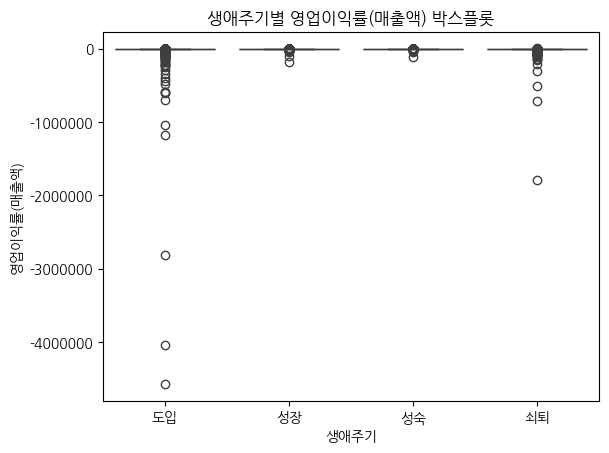

In [15]:
sns.boxplot(data=df.reset_index(drop=True), x='생애주기', y='영업이익률(매출액)')
plt.title("생애주기별 영업이익률(매출액) 박스플롯")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

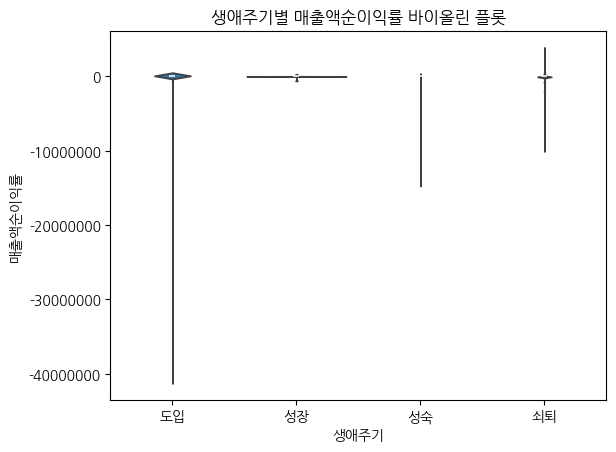

In [18]:
sns.violinplot(data=df.reset_index(drop=True), x='생애주기', y='매출액순이익률')
plt.title("생애주기별 매출액순이익률 바이올린 플롯")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 윈저라이징 이후 시각화 : 윈저라이징 이후에도 이상치가 많이 있음을 알 수 있음

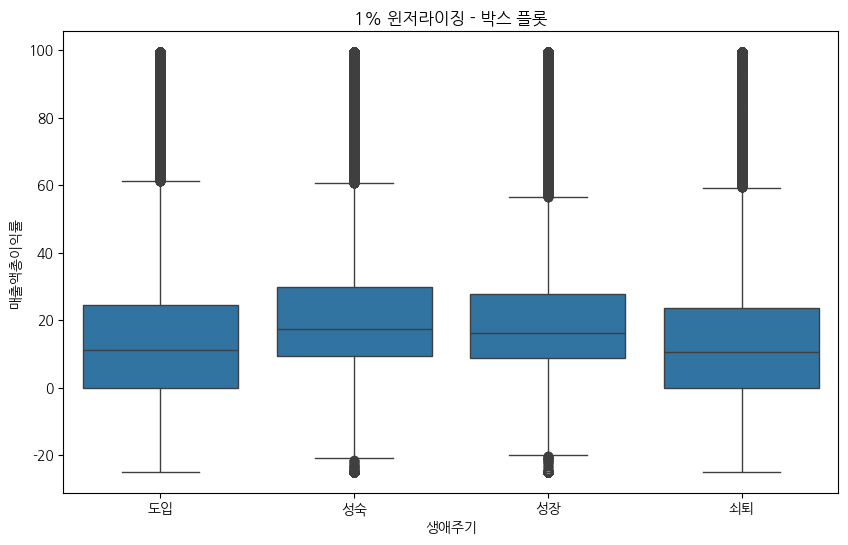

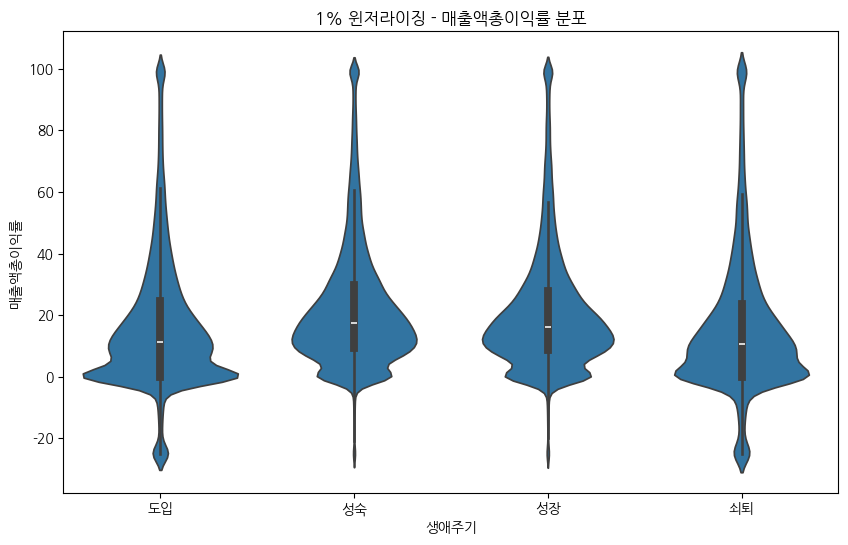

In [23]:
target_col = '매출액총이익률'  # 원하는 변수명
stage_order = ["도입", "성숙", "성장", "쇠퇴"]

# 데이터 불러오기 및 1% 윈저라이징
df_w1 = pd.concat([
    pd.read_csv(f"/content/eda{stage}.csv").assign(생애주기=stage)
    for stage in stage_order
], ignore_index=True)

df_w1[target_col] = stats.mstats.winsorize(df_w1[target_col], limits=[0.01, 0.01])

# 박스플롯 단독 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_w1, x='생애주기', y=target_col, order=stage_order)
plt.title("1% 윈저라이징 - 박스 플롯")
plt.show()

# 바이올린 플롯 시각화
plt.figure(figsize=(10,6))
sns.violinplot(data=df_w1, x='생애주기', y=target_col, order=stage_order)
plt.title("1% 윈저라이징 - 매출액총이익률 분포")
plt.show()

### 범주형 시각화 (countplot으로 레이블별 빈도 확인)

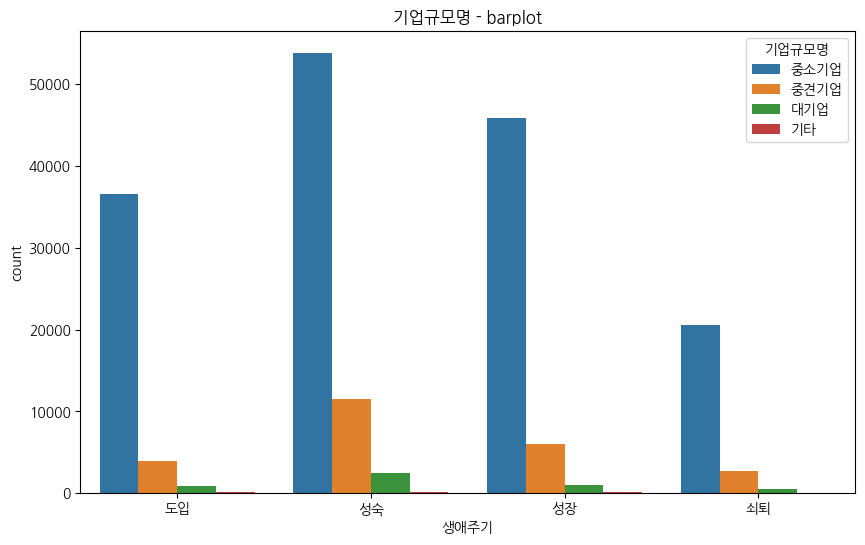

In [27]:
target_col = '기업규모명'  # 원하는 변수명
stage_order = ["도입", "성숙", "성장", "쇠퇴"]

df_w1 = pd.concat([
    pd.read_csv(f"/content/eda{stage}.csv").assign(생애주기=stage)
    for stage in stage_order
], ignore_index=True)

# barplot 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_w1, x='생애주기', hue=target_col, order=stage_order)
plt.title(f"{target_col} - barplot")
plt.show()